# Render all the objects in obj2d.s

In [52]:
def getFaceData(face_data, verts):
    faces_string = face_data
    faces = [x.strip() for x in faces_string.split('\n') if x.strip()][:-1]
    faces = [x.split('\t')[0].split(' ')[1] for x in faces]
    no_faces = int(faces[0])
    faces = faces[1:]
    pairs_string = verts
    pairs = [int(x) for x in pairs_string.split()[1].split(',')]
    
    vertices = []
    intensities = []
    colors = []
    for i in range(0,len(faces),5):
        color = int(faces[i][-2:],16)
        colors += [color]

        index1 = int(faces[i+1].split(',')[0].strip('$'))
        index2 = int(faces[i+2].split(',')[0].strip('$'))
        index3 = int(faces[i+3].split(',')[0].strip('$'))
        vertex1 = tuple(pairs[index1*2:(index1*2)+2])
        vertex2 = tuple(pairs[index2*2:(index2*2)+2])
        vertex3 = tuple(pairs[index3*2:(index3*2)+2])
        vertices += [[vertex1,vertex2,vertex3]]

        intensity1 = int(faces[i+1].split(',')[1][1:3],16)
        intensity2 = int(faces[i+2].split(',')[1][1:3],16)
        intensity3 = int(faces[i+3].split(',')[1][1:3],16)
        intensities += [(intensity1,intensity2,intensity3)]
    return (no_faces, colors, intensities, vertices)

Had to clean up `obj2d.s` a bit. The claws are split out into a separate file `claws.s`.

In [62]:
data = open("obj2d_cleaned.s").read().split(":")
poly_data = []
poly_names = []
for i in range(1,len(data),2):
    poly_name = data[i-1].splitlines()[-1]
    poly_names += [poly_name]
    poly_data += [getFaceData(data[i],data[i+1])]

[(128, 192, 255), (64, 128, 192), (128, 192, 255), (64, 128, 192)]


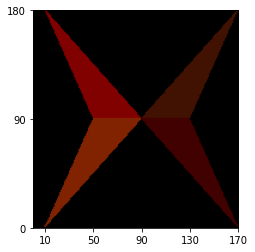

[(240, 128, 64), (240, 128, 64), (240, 128, 64), (240, 128, 64), (240, 128, 64), (240, 128, 64), (240, 128, 64), (240, 128, 64), (128, 192, 255), (64, 96, 143), (128, 192, 255), (64, 96, 143)]


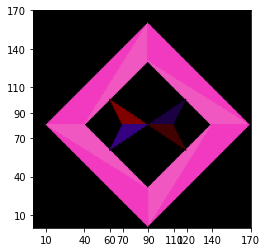

[(128, 64, 255), (64, 96, 255), (64, 128, 255), (128, 128, 255), (128, 192, 255), (64, 96, 143), (128, 192, 255), (64, 96, 143), (128, 192, 255), (64, 96, 143), (128, 192, 255), (64, 96, 143)]


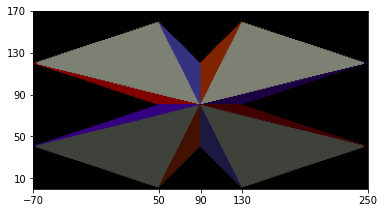

[(64, 128, 96), (255, 128, 96)]


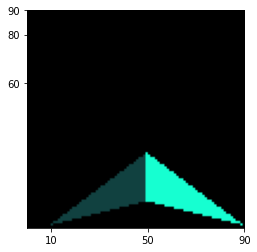

[(64, 128, 96), (255, 128, 96)]


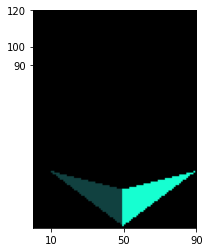

[(255, 255, 255), (255, 255, 255), (255, 255, 255), (255, 255, 255), (255, 255, 255), (255, 255, 255)]


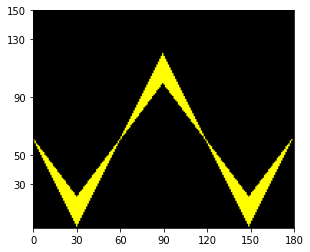

[(128, 192, 192), (192, 192, 255), (255, 255, 255), (255, 255, 255), (255, 192, 192), (192, 192, 128)]


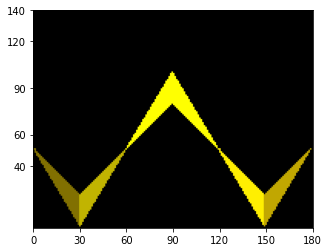

[(96, 160, 160), (160, 160, 224), (224, 255, 255), (255, 255, 224), (224, 160, 160), (160, 160, 96)]


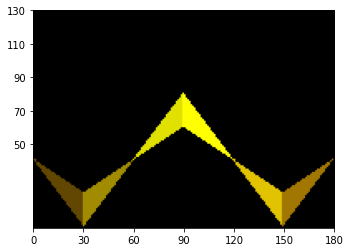

[(64, 128, 128), (128, 128, 192), (192, 255, 255), (255, 255, 192), (192, 128, 128), (128, 128, 64)]


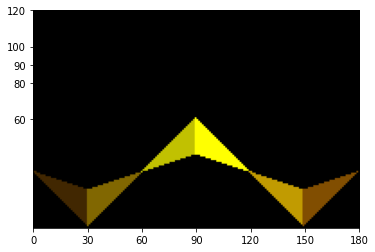

[(64, 128, 128), (128, 128, 192), (192, 255, 255), (255, 255, 192), (192, 128, 128), (128, 128, 64)]


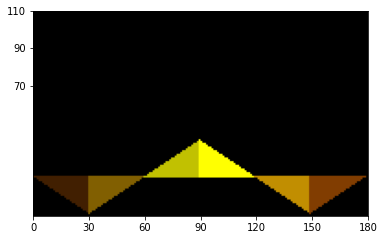

[(64, 128, 128), (128, 128, 192), (192, 255, 255), (255, 255, 192), (192, 128, 128), (128, 128, 64)]


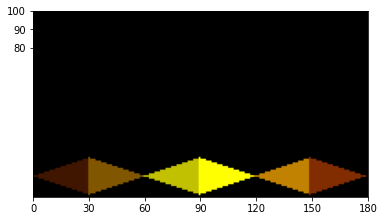

[(192, 255, 64), (192, 255, 64)]


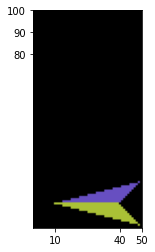

[(192, 255, 64)]


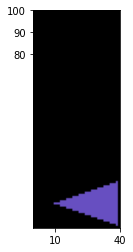

[(96, 32, 255), (96, 32, 255), (96, 32, 255), (96, 32, 255)]


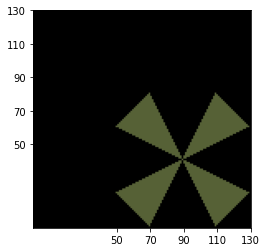

[(128, 192, 255), (128, 192, 255)]


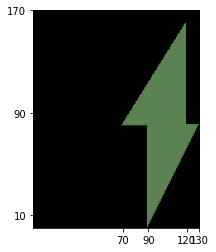

[(192, 255, 64), (192, 255, 64)]


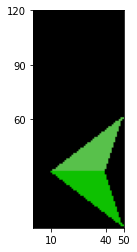

[(192, 255, 64), (192, 255, 64)]


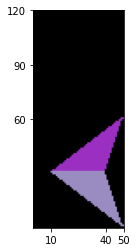

[(255, 128, 255), (255, 255, 192), (255, 192, 192)]


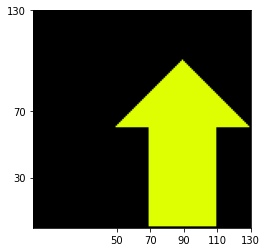

[(255, 128, 128), (255, 128, 128), (255, 128, 128), (255, 128, 128)]


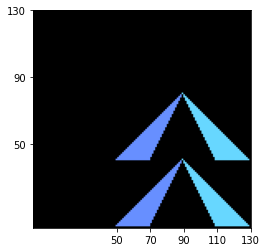

[(96, 96, 255), (96, 96, 255), (96, 96, 255)]


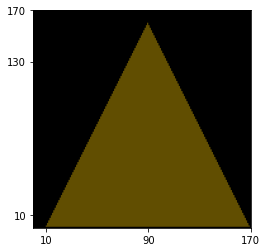

[(96, 255, 192), (96, 255, 192)]


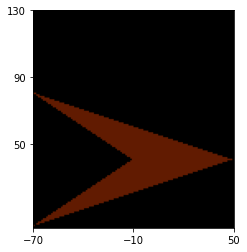

[(255, 255, 255), (255, 192, 255), (192, 128, 255), (128, 128, 255), (128, 192, 255), (192, 255, 255)]


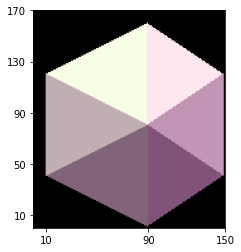

[(128, 192, 255), (192, 160, 255), (160, 192, 255), (192, 160, 255), (160, 192, 255), (192, 128, 255)]


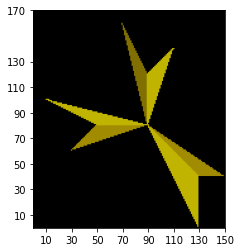

[(128, 192, 255), (192, 160, 255), (160, 192, 255), (192, 160, 255), (160, 192, 255), (192, 128, 255)]


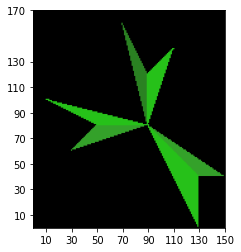

[(255, 192, 128), (128, 96, 64)]


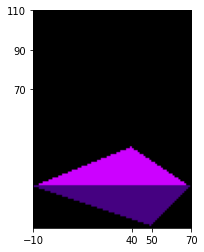

[(128, 192, 255), (128, 192, 255), (128, 192, 255), (128, 192, 255)]


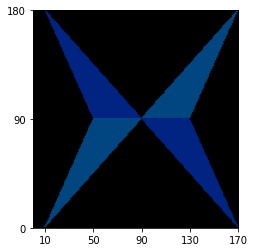

[(255, 128, 192), (255, 128, 192), (255, 128, 192), (255, 128, 192)]


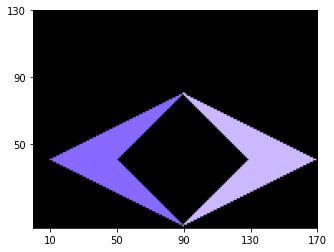

[(255, 64, 64), (255, 64, 64), (255, 128, 192), (255, 128, 192), (255, 128, 192), (255, 128, 192)]


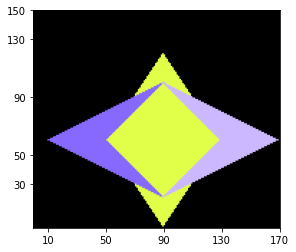

[(128, 64, 64), (128, 64, 128), (128, 96, 96), (128, 128, 96), (96, 64, 96), (64, 64, 96), (192, 240, 128), (192, 240, 128)]


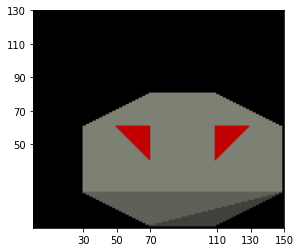

[(240, 240, 192), (240, 192, 160), (192, 160, 160), (160, 192, 255)]


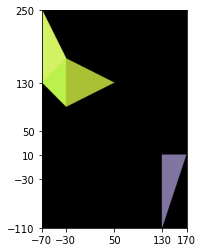

[(240, 240, 192), (240, 192, 160), (192, 160, 160), (160, 192, 255)]


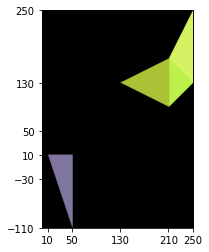

[(255, 192, 192), (192, 128, 128), (128, 192, 64), (192, 255, 128), (192, 128, 192), (128, 64, 128), (64, 128, 192), (128, 192, 240)]


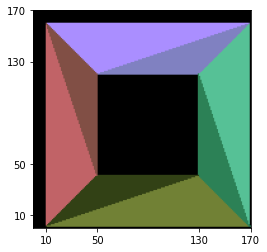

In [54]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cry_rgb as cry

flatten = lambda l: [e for sublist in l for e in sublist]

for p in poly_data:
    no_faces, colors, intensities, vertices = p

    # Scale the vertices up * 10 so we get a decent size image.
    scaled_vertices = [
        [(x*10,y*10) for (x,y) in verts]
        for verts in vertices
    ]
    
    # Get the xs and ys so we can use them in our dimensions
    xs = [x for (x,y) in flatten(scaled_vertices)]
    ys = [y for (x,y) in flatten(scaled_vertices)]
    x_offset = abs(min(xs) if min(xs) < 0 else 0)
    y_offset = abs(min(ys) if min(ys) < 0 else 0)
    height = max(ys) + y_offset
    width = max(xs) + x_offset
    im = Image.new('RGB', (width+2, height+2))
    draw = ImageDraw.Draw(im)

    print(intensities)
    for i,vertex in enumerate(scaled_vertices):
        vertex = [(x+x_offset,y+y_offset) for x,y in vertex]
        # FIXME: Get the intensity value right here.
        color = cry.cry_to_rgb2(colors[i],intensities[i][0])
        draw.polygon(vertex, fill = color)
    fig, ax = plt.subplots()
    # Offset the plot ticks to allow for negative values
    ax.imshow(im,extent=[min(min(xs),0), max(xs), min(min(ys),0), max(ys)])

    # Only use the vertices for ticks in our graph
    plt.xticks(list(sorted(set(xs))))
    plt.yticks(list(sorted(set(ys))))
    plt.show()

In [66]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cry_rgb as cry
from ascii_magic import AsciiArt


flatten = lambda l: [e for sublist in l for e in sublist]

ascii_images = []
for p in poly_data:
    no_faces, colors, intensities, vertices = p

    # Scale the vertices up * 10 so we get a decent size image.
    scaled_vertices = [
        [(x*10,y*10) for (x,y) in verts]
        for verts in vertices
    ]
    
    # Get the xs and ys so we can use them in our dimensions
    xs = [x for (x,y) in flatten(scaled_vertices)]
    ys = [y for (x,y) in flatten(scaled_vertices)]
    x_offset = abs(min(xs) if min(xs) < 0 else 0)
    y_offset = abs(min(ys) if min(ys) < 0 else 0)
    height = max(ys) + y_offset
    width = max(xs) + x_offset
    im = Image.new('RGB', (width+2, height+2))
    draw = ImageDraw.Draw(im)

    for i,vertex in enumerate(scaled_vertices):
        vertex = [(x+x_offset,y+y_offset) for x,y in vertex]
        # FIXME: Get the intensity value right here.
        color = cry.cry_to_rgb2(colors[i],intensities[i][0])
        draw.polygon(vertex, fill = color)
    my_art = AsciiArt.from_pillow_image(im)
    ascii_images += [my_art.to_ascii(columns=60)]

for i,ascii_image in enumerate(ascii_images):
    print('; ' + poly_names[i])
    print(''.join(["; " + l +"\n" for l in ascii_image.splitlines()]))
    print('; ')


; s_flipper
;    `;`                                                   .:-
;     -/^`                                               .:^- 
;      `"|;`                                           .'==`  
;       `/)"^`                                       .:=+=`   
;        `/||"^`                                   .:=++=`    
;         `/|||";`                               .:=+=+=`     
;          `/|||||^`                           .'=+==+=`      
;           `/|||||"^`                       .:=+===+=`       
;            `/||||||"^-                   .:=+======`        
;             `/||||||||^`               .:=+=====+=`         
;              `/|||||||||^`           .:=+======+=`          
;               `/||||||||||=-       .,=+=======+=`           
;                ./||||||||||"^-   `:=++=======+=`            
;                 ./))))))))))\\+-'============^`             
;                 _>vvvvvvvvvv%i+`-:,,,,,,,,,,,:`             
;                _i%vvvvvvvv%)=`    -:,,,,,

;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                             
;                                                      

;                                                             
;                                                             
;                                                             
;                                                           -_
;                                                       .`^%*)
;                                                     .|*?1{` 
;                                                  :\\I1[1*"  
;                                                ^x]11[[[t<   
;                                            ."*}]1[[[[[t<`   
;                                         :/\I1[[[[[[[[[s;    
;                                       ^c]11[[[[[[[[[[t:     
;                                   `|{s[1[[[[[[[[[[[[[=.     
;                                :;<I1[[[[[[[[[[[[[[[]r.      
;                              ;c]1[[[[[[[[[[[[[[[[[1!        
;                          -)ll[1[[[[[[[[[[[[[[[[[[1}^        
;                       '')I11[[[[[[[[[[[[[[[[[[[[[]%  

;                                                             
;                                 .,,\%v;_                    
;                            `,)>x*!!!!!!Iv)-                 
;                      .;;<%{*!!!!!!!!!!!!!!}s|;.             
;                .`;\)c*!!!!!!!!!!!!!!!!!!!!!!!!s)=.          
;           .;;<%**!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!*c=:       
;     .`^\ic}!!]]!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!]]!c):.   
; ``/>cc{{*{{ssssssssssssssssssssssssssssssssssssssssss{*rc"- 
; ..'',^=//""""//////////////////////////////////////////""^- 
;        .`''^^//"""""""""""""""""""""""""""""""""""""""/;`   
;              ..-':^^//""""""""""""""""""""""""""""""+:.     
;                     ..__;^+//"""""""""""""""""""""='        
;                            .`_'^^//"""""""""""""^_          
;                                  ..__,^=//"""/;`            
;                                         .`_';`              

; 
; blueflipper
;    `,`                             